#**Machine Learning Based Prediction of COVID-19 Diagnosis based on Symptoms**

**Libraries**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

**Load CSV Data Into Variable**

In [ ]:
# Store CSV FIle Data Into Variable
df = pd.read_csv("/content/drive/MyDrive/Dataset/Covid Dataset.csv")

# Display Top 5 Rows
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


#**Preprocessing**

**Counting NULL Values By Columns**

In [ ]:
# Counting NULL Values By Columns
df.isnull().sum(axis = 0)

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

**Counting NULL Values By Rows**

In [ ]:
# Counting NULL Values By Rows
df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
       ..
5429    0
5430    0
5431    0
5432    0
5433    0
Length: 5434, dtype: int64

In [ ]:
# Display Columns Names
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

**Label Encoder**

In [ ]:
# Create Object of Label Encoder
le = LabelEncoder()

In [ ]:
# Assign Data To New Variable
df_le = df
for col in df_le.columns:
  df_le[col] =le.fit_transform(df_le[col])

In [ ]:
# Display Data
df_le.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


#**Checking Dataset Is Imbalance or Not**

---

**NOTE :** Data is imabalnced.

**COVID19 (Positive +) :** 80.66%

**COVID (Negative -) :** 19.34% 

In [ ]:
df_le['COVID-19'].value_counts()

1    4383
0    1051
Name: COVID-19, dtype: int64

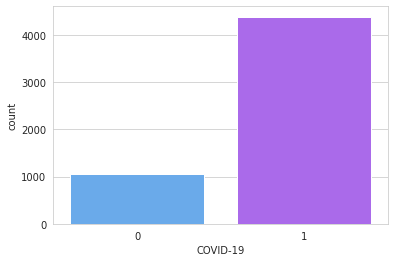

In [ ]:
# Display Data Based on "credit_card_default"/Target Column
sb.set_style('whitegrid')
sb.countplot(x='COVID-19', data=df_le, palette='cool')

In [ ]:
# Get COVID19 or Not COVID19
covid = df_le[df_le['COVID-19'] ==1 ]
no_covid = df_le[df_le['COVID-19'] == 0 ]

# Display Size
print(df_le.shape)
print(covid.shape)
print(no_covid.shape)

(5434, 21)
(4383, 21)
(1051, 21)


**Using Resample To Solve This Imbalanced Dataset With Oversampling/Upsampling.**

In [ ]:
# Import Library
from sklearn.utils import resample

# Upsample The Minority Class
no_covid_upsampled = resample(no_covid, 
                    replace = True, # Sample With Replacement
                    n_samples = 4383,
                    random_state = 42) 

# Combine The Class With Upsampled Minority Class
new_data = pd.concat([no_covid_upsampled, covid])

# Display Data After Over Sample
print(new_data.shape)

(8766, 21)


In [ ]:
new_data['COVID-19'].value_counts()

1    4383
0    4383
Name: COVID-19, dtype: int64

In [ ]:
# Get COVID19 or Not COVID19
covid = new_data[new_data['COVID-19'] ==1 ]
no_covid = new_data[new_data['COVID-19'] == 0 ]

# Display Size
print(new_data.shape)
print(covid.shape)
print(no_covid.shape)

(8766, 21)
(4383, 21)
(4383, 21)


**Define X & Y Data**

In [ ]:
# X
X = new_data.drop(['COVID-19'], axis="columns")

# Display Top 5 Rows
X.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
4935,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5119,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
4196,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0
4541,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0
4405,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0


In [ ]:
# y
y = new_data['COVID-19']

# Display Top 5 Rows
y.head()

4935    0
5119    0
4196    0
4541    0
4405    0
Name: COVID-19, dtype: int64

**Split Train & Test Data**

In [ ]:
# Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#**Logistic Regression**

In [ ]:
# Create Model
lr = LogisticRegression()

In [ ]:
# Fit Train Data
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Y Predicted : This is predicted by our model.
lr_y_predicted = lr.predict(X_test)
print(y_test)
print(lr_y_predicted)

1415    1
4714    0
1696    1
5016    0
4476    0
       ..
4210    0
4966    0
290     1
4763    0
1421    1
Name: COVID-19, Length: 2630, dtype: int64
[1 0 1 ... 1 0 1]


In [ ]:
# Accuracy of Model
lr.score(X_test, y_test)

0.9596958174904943

In [ ]:
# Accuracy, Precision, Recall, F1 Score
lr_accuracy = accuracy_score(y_test, lr_y_predicted)*100
lr_precision = precision_score(y_test, lr_y_predicted)*100
lr_recall = recall_score(y_test, lr_y_predicted)*100
lr_f1 = f1_score(y_test, lr_y_predicted)*100

print('Accuracy : %.3f' % (lr_accuracy))
print('Precision : %.3f' % (lr_precision))
print('Recall : %.3f' % (lr_recall))
print('F1 Score : %.3f' % (lr_f1))

Accuracy : 95.970
Precision : 96.934
Recall : 94.846
F1 Score : 95.879


**Confusion Matrix**

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_y_predicted)
cm

array([[1291,   39],
       [  67, 1233]])

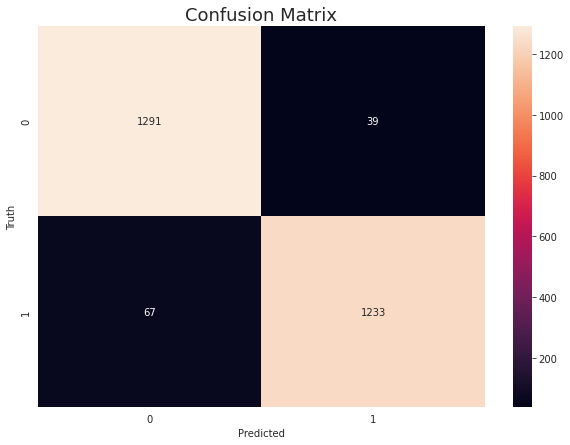

In [ ]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix',fontsize=18)
plt.show()

#**Naive Bayes**

In [ ]:
# Create Model
model = GaussianNB()

In [ ]:
# Fit Training Data
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Y Predicted : This is predicted by our model.
nb_y_predicted = model.predict(X_test)
nb_y_predicted

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
# Accuracy of Model
model.score(X_test, y_test)

0.8330798479087452

In [ ]:
# Accuracy, Precision, Recall, F1 Score
nb_accuracy = accuracy_score(y_test, nb_y_predicted)*100
nb_precision = precision_score(y_test, nb_y_predicted)*100
nb_recall = recall_score(y_test, nb_y_predicted)*100
nb_f1 = f1_score(y_test, nb_y_predicted)*100

print('Accuracy : %.3f' % (nb_accuracy))
print('Precision : %.3f' % (nb_precision))
print('Recall : %.3f' % (nb_recall))
print('F1 Score : %.3f' % (nb_f1))

Accuracy : 83.308
Precision : 100.000
Recall : 66.231
F1 Score : 79.685


**Confusion Matrix**

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, nb_y_predicted)
cm

array([[1330,    0],
       [ 439,  861]])

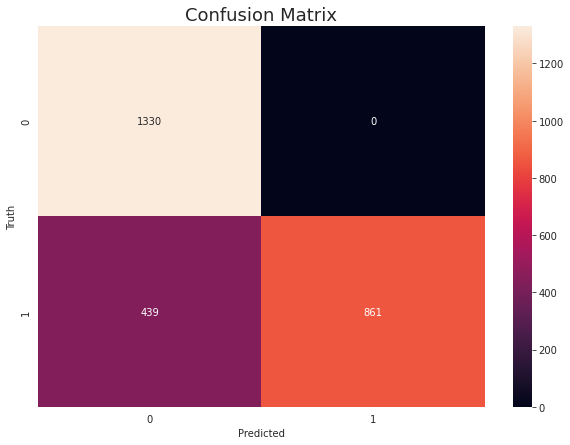

In [ ]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#**SVM With RBF Kernel**

In [ ]:
# Create Model
svm = SVC(kernel='rbf')

In [ ]:
# Fit Training Data
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Y Predicted : This is predicted by our model.
svm_rbf_y_predicted = svm.predict(X_test)
svm_rbf_y_predicted

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Accuracy of Model
svm.score(X_test, y_test)

0.9889733840304182

In [ ]:
# Accuracy, Precision, Recall, F1 Score
svm_accuracy = accuracy_score(y_test, svm_rbf_y_predicted)*100
svm_precision = precision_score(y_test, svm_rbf_y_predicted)*100
svm_recall = recall_score(y_test, svm_rbf_y_predicted)*100
svm_f1 = f1_score(y_test, svm_rbf_y_predicted)*100

print('Accuracy : %.3f' % (svm_accuracy))
print('Precision : %.3f' % (svm_precision))
print('Recall : %.3f' % (svm_recall))
print('F1 Score : %.3f' % (svm_f1))

Accuracy : 98.897
Precision : 100.000
Recall : 97.769
F1 Score : 98.872


**Confusion Matrix**

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, svm_rbf_y_predicted)
cm

array([[1330,    0],
       [  29, 1271]])

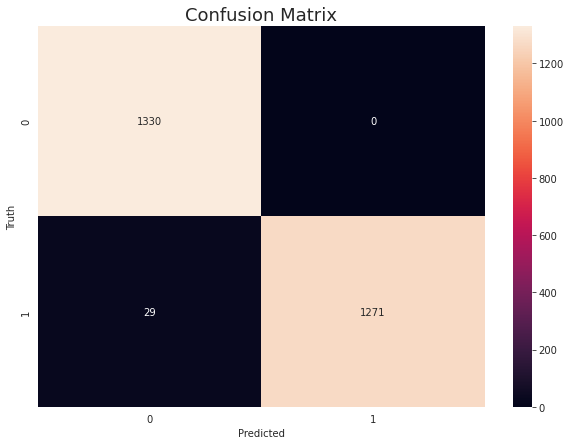

In [ ]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#**SVM With Linear Kernel**

In [ ]:
# Create Model
svm_l = SVC(kernel='linear')

In [ ]:
# Fit Training Data
svm_l.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Y Predicted : This is predicted by our model.
svm_linear_y_predicted = svm_l.predict(X_test)
svm_linear_y_predicted

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Accuracy of Model
svm_l.score(X_test, y_test)

0.9593155893536122

In [ ]:
# Accuracy, Precision, Recall, F1 Score
svm_l_accuracy = accuracy_score(y_test, svm_linear_y_predicted)*100
svm_l_precision = precision_score(y_test, svm_linear_y_predicted)*100
svm_l_recall = recall_score(y_test, svm_linear_y_predicted)*100
svm_l_f1 = f1_score(y_test, svm_linear_y_predicted)*100

print('Accuracy : %.3f' % (svm_l_accuracy))
print('Precision : %.3f' % (svm_l_precision))
print('Recall : %.3f' % (svm_l_recall))
print('F1 Score : %.3f' % (svm_l_f1))

Accuracy : 95.932
Precision : 96.932
Recall : 94.769
F1 Score : 95.838


**Confusion Matrix**

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, svm_linear_y_predicted)
cm

array([[1291,   39],
       [  68, 1232]])

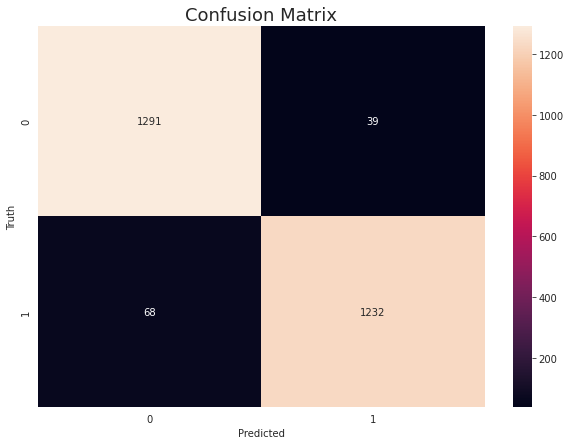

In [ ]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#**SVM With Poly Kernel**

In [ ]:
# Create Model
svm_p= SVC(kernel='poly')

In [ ]:
# Fit Training Data
svm_p.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
# Y Predicted : This is predicted by our model.
svm_poly_y_predicted = svm_p.predict(X_test)
svm_poly_y_predicted

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Accuracy of Model
svm_p.score(X_test, y_test)

0.9889733840304182

In [ ]:
# Accuracy, Precision, Recall, F1 Score
svm_p_accuracy = accuracy_score(y_test, svm_poly_y_predicted)*100
svm_p_precision = precision_score(y_test, svm_poly_y_predicted)*100
svm_p_recall = recall_score(y_test, svm_poly_y_predicted)*100
svm_p_f1 = f1_score(y_test, svm_poly_y_predicted)*100

print('Accuracy : %.3f' % (svm_p_accuracy))
print('Precision : %.3f' % (svm_p_precision))
print('Recall : %.3f' % (svm_p_recall))
print('F1 Score : %.3f' % (svm_p_f1))

Accuracy : 98.897
Precision : 100.000
Recall : 97.769
F1 Score : 98.872


**Confusion Matrix**

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, svm_poly_y_predicted)
cm

array([[1330,    0],
       [  29, 1271]])

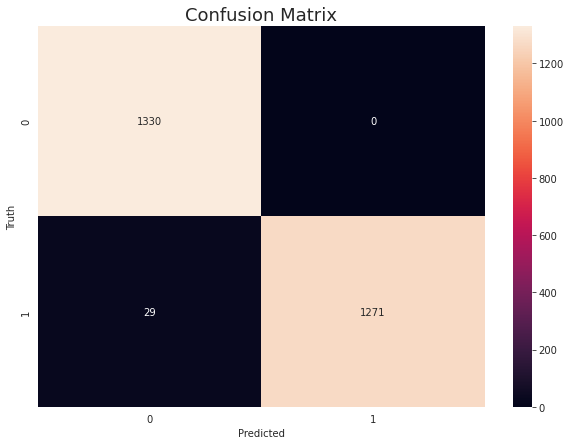

In [ ]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#**Random Forest**

In [ ]:
# Create Model
random_model = RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# Fit Training Data
random_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# Y Predicted : This is predicted by our model.
rf_y_predicted = random_model.predict(X_test)
rf_y_predicted

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Accuracy of Model
random_model.score(X_test, y_test)

0.9889733840304182

In [ ]:
# Accuracy, Precision, Recall, F1 Score
random_model_accuracy = accuracy_score(y_test, rf_y_predicted)*100
random_model_precision = precision_score(y_test, rf_y_predicted)*100
random_model_recall = recall_score(y_test, rf_y_predicted)*100
random_model_f1 = f1_score(y_test, rf_y_predicted)*100

print('Accuracy : %.3f' % (random_model_accuracy))
print('Precision : %.3f' % (random_model_precision))
print('Recall : %.3f' % (random_model_recall))
print('F1 Score : %.3f' % (random_model_f1))

Accuracy : 98.897
Precision : 100.000
Recall : 97.769
F1 Score : 98.872


**Confusion Matrix**

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_y_predicted)
cm

array([[1330,    0],
       [  29, 1271]])

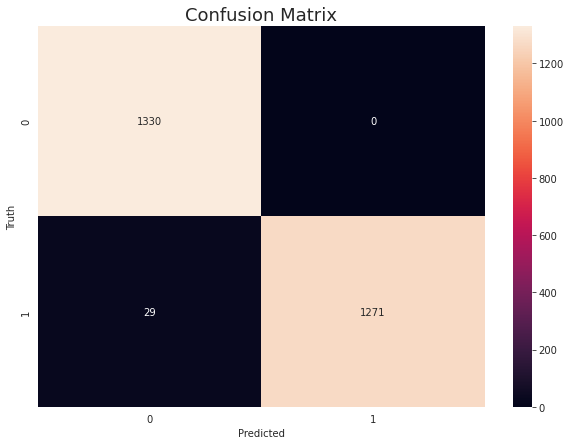

In [ ]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True,fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Import Libraries
from sklearn.tree import export_graphviz

# Pull Out One Tree From The Forest
import pydot  

feature_list = list(X.columns)

# Export The Image To dot File
tree = random_model.estimators_[5] 

# Use dot File To Create Graph
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1) 
(graph, ) = pydot.graph_from_dot_file('tree.dot') 

# Write Graph To PNG File
graph.write_png('tree.png')

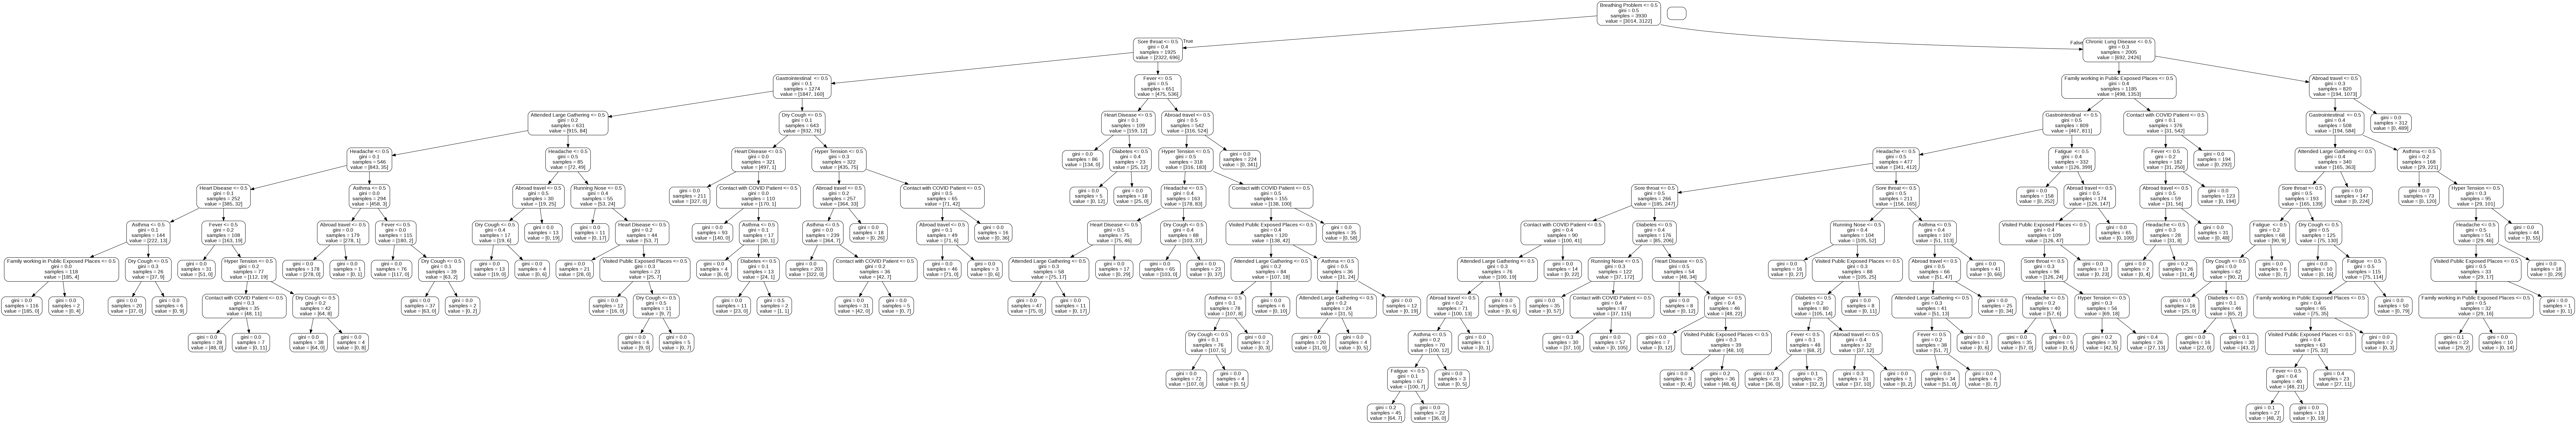

In [ ]:
from IPython.display import Image
Image('tree.png')

#**ROC-AUC Curve**

In [ ]:
# Import Library
from sklearn.metrics import roc_curve, roc_auc_score

random_probs = [0 for _ in range(len(y_test))]
random_auc = roc_auc_score(y_test, random_probs)


Logistic Regression ROC - AUC Score :  0.959569115095431

Naive Bayes ROC - AUC Score :  0.8311538461538461

SVM (Linear) ROC - AUC Score :  0.9591844997108155

SVM (RBF) ROC - AUC Score :  0.9888461538461538

SVM (Linear) ROC - AUC Score :  0.9888461538461538

Random Forest ROC - AUC Score :  0.9888461538461538




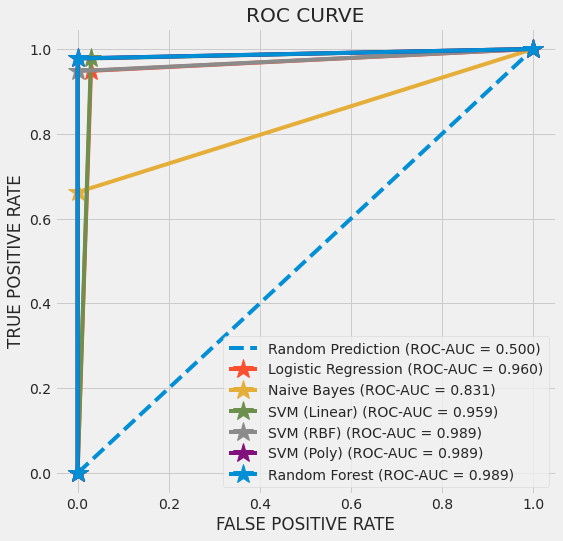

In [ ]:
# Logistic Regression
lr_auc = roc_auc_score(y_test, lr_y_predicted)
# Naive Bayes
nb_auc = roc_auc_score(y_test, nb_y_predicted)
# SVM Linear
svm_linear_auc = roc_auc_score(y_test, svm_linear_y_predicted)
# SVM RBF
svm_rbf_auc = roc_auc_score(y_test, svm_rbf_y_predicted)
# SVM Poly
svm_poly_auc = roc_auc_score(y_test, svm_poly_y_predicted)
# Random Forest
rf_auc = roc_auc_score(y_test, rf_y_predicted)


# ROC-AUC Score
print("\nLogistic Regression ROC - AUC Score : ", lr_auc)
print("\nNaive Bayes ROC - AUC Score : ", nb_auc)
print("\nSVM (Linear) ROC - AUC Score : ", svm_linear_auc)
print("\nSVM (RBF) ROC - AUC Score : ", svm_rbf_auc)
print("\nSVM (Linear) ROC - AUC Score : ", svm_poly_auc)
print("\nRandom Forest ROC - AUC Score : ", rf_auc)
print("\n")

# Calculate ROC - CURVE FPR & TPR
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_predicted)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_predicted)
svm_linear_fpr, svm_linear_tpr, _ = roc_curve(y_test, svm_linear_y_predicted)
svm_rbf_fpr, svm_rbf_tpr, _ = roc_curve(y_test, svm_rbf_y_predicted)
svm_poly_fpr, svm_poly_tpr, _ = roc_curve(y_test, svm_poly_y_predicted)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_predicted)

# Plot The ROC-AUC Curve
plt.figure(figsize=(8, 8))
plt.plot(random_fpr, random_tpr, linestyle = '--', label = "Random Prediction (ROC-AUC = %0.3f)" % random_auc)
plt.plot(lr_fpr, lr_tpr, marker = "*", markersize = 20, label = "Logistic Regression (ROC-AUC = %0.3f)" % lr_auc)
plt.plot(nb_fpr, nb_tpr, marker = "*", markersize = 20, label = "Naive Bayes (ROC-AUC = %0.3f)" % nb_auc)
plt.plot(svm_linear_fpr, svm_rbf_tpr, marker = "*", markersize = 20, label = "SVM (Linear) (ROC-AUC = %0.3f)" % svm_linear_auc)
plt.plot(svm_rbf_fpr, svm_linear_tpr, marker = "*", markersize = 20, label = "SVM (RBF) (ROC-AUC = %0.3f)" % svm_rbf_auc)
plt.plot(svm_poly_fpr, svm_poly_tpr, marker = "*",markersize = 20,  label = "SVM (Poly) (ROC-AUC = %0.3f)" % svm_poly_auc)
plt.plot(rf_fpr, rf_tpr, marker = "*", markersize = 20, label = "Random Forest (ROC-AUC = %0.3f)" % rf_auc)

plt.title("ROC CURVE")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.legend()
plt.show()

#**Feature Importance**

In [ ]:
# Get Numerical Feature Importances
importances = list(random_model.feature_importances_)

# List of Tuples With Variable & Importance
feature_importances = [(df_le, round(importance, 2)) for feature, importance in zip(df_le.columns, importances)]

# Sort The Feature Importances By Most Important First
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print Out The Feature & Importances 
x_values = list(range(len(importances)))
for i in range(len(x_values)):
  print(x_values[i],"\t", df_le.columns[i], ":\t", importances[i])

0 	 Breathing Problem :	 0.1516416346085455
1 	 Fever :	 0.0511758827431484
2 	 Dry Cough :	 0.0817354317109285
3 	 Sore throat :	 0.16911632348363564
4 	 Running Nose :	 0.02070615221804294
5 	 Asthma :	 0.013152435417224304
6 	 Chronic Lung Disease :	 0.016399381911390044
7 	 Headache :	 0.013705685160334307
8 	 Heart Disease :	 0.01708369266726272
9 	 Diabetes :	 0.015095546050409428
10 	 Hyper Tension :	 0.016038195251828508
11 	 Fatigue  :	 0.015937612535482305
12 	 Gastrointestinal  :	 0.017559189807104393
13 	 Abroad travel :	 0.15785325435629613
14 	 Contact with COVID Patient :	 0.05488950973045144
15 	 Attended Large Gathering :	 0.14162730207393098
16 	 Visited Public Exposed Places :	 0.018708055957950814
17 	 Family working in Public Exposed Places :	 0.027574714316033682
18 	 Wearing Masks :	 0.0
19 	 Sanitization from Market :	 0.0


Text(0.5, 1.0, 'Variable Importances')

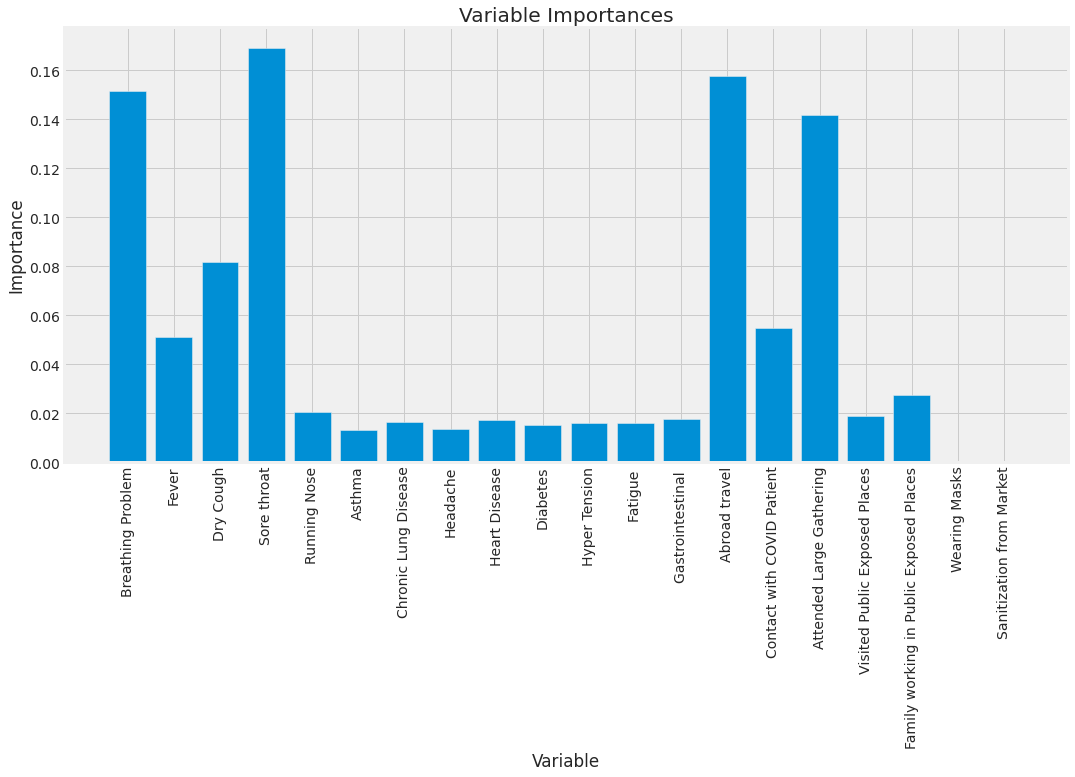

In [ ]:
# Figure Size
plt.figure(figsize=(18, 8))

# Set The Style
plt.style.use('fivethirtyeight')

# List of X Locations for Plotting
x_values = list(range(len(importances)))

# Make Bar Chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick Labels for X axis
plt.xticks(x_values, df_le.columns, rotation='vertical')

# Axis Labels & Title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

#**Logistic Regression, Naive Bayes, SVM(RBF, Linear, Poly), Random Forest**

---
**Accuracy, Precision, Recall, F1 Score**


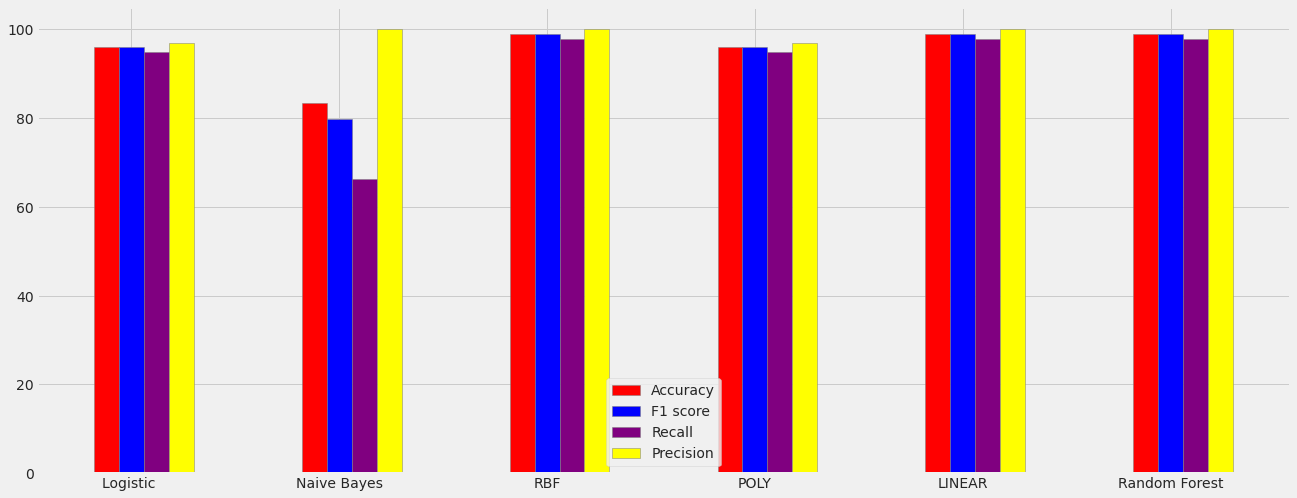

In [ ]:
# Set Width of Bar
barWidth = 0.12

# Set Height of Bar
fig = plt.subplots(figsize =(20, 8))

Accuracy = [lr_accuracy, nb_accuracy, svm_accuracy, svm_l_accuracy, svm_p_accuracy, random_model_accuracy]
F1_score = [lr_f1, nb_f1, svm_f1, svm_l_f1, svm_p_f1, random_model_f1]
Precision = [lr_precision, nb_precision, svm_precision, svm_l_precision, svm_p_precision, random_model_precision]
Recall = [lr_recall, nb_recall, svm_recall, svm_l_recall, svm_p_recall, random_model_recall]


# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]


# Make the plot
plt.bar(br1, Accuracy, color ='red', width = barWidth,
		edgecolor ='grey', label ='Accuracy')
plt.bar(br2, F1_score, color ='Blue', width = barWidth,
		edgecolor ='grey', label ='F1 score')
plt.bar(br3, Recall, color ='Purple', width = barWidth,
		edgecolor ='grey', label ='Recall')
plt.bar(br4, Precision, color ='Yellow', width = barWidth,
		edgecolor ='grey', label ='Precision')


# Adding Xticks
plt.xticks([r + barWidth for r in range(len(Accuracy))],
		['Logistic ','Naive Bayes','RBF','POLY','LINEAR','Random Forest'])

plt.legend()
plt.show()